<a href="https://colab.research.google.com/github/stsmith1991/Adv_DS_libs/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Домашняя работа по теме "обучение без учителя"

Задание 1. Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250,random_state=42. Постройте диаграмму рассеяния на этих данных.


In [42]:
#Иморотирую необходимые библиотеки и подгружаю исходные данные
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
 
df = load_boston()

In [43]:
#Разбиваю на тренировочные данные
all = df["data"]
observations = df["feature_names"]
target = df["target"]
X = pd.DataFrame(all, columns=observations)
y = pd.DataFrame(target, columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [44]:
#Масштабирую датасет
scaled=StandardScaler()
train_scaled = pd.DataFrame(scaled.fit_transform(X_train), columns=X_train.keys())
#Сжимаю масштабируемую модель с параметрами
tsne_red = TSNE(n_components=2, random_state=100, learning_rate=250)
redused = tsne_red.fit_transform(train_scaled)

In [45]:
#Преобразую в "сырые" данные
#finally_data = scaled.inverse_transform(redused)

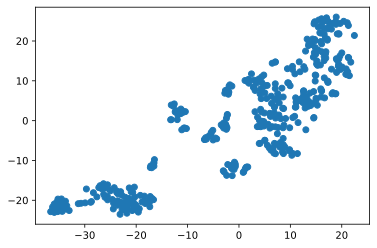

In [46]:
#Строю диаграмму рассеивания
plt.scatter(redused[:, 0], redused[:, 1])

Распределение вышло не информативным. Попробую сжать абсолютные (не масштабированные) данные

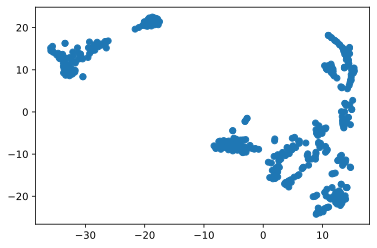

In [47]:
redused = tsne_red.fit_transform(X_train, y_train)
plt.scatter(redused[:, 0], redused[:, 1])

Задание 2. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

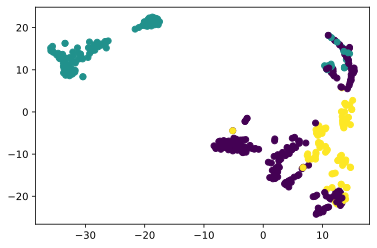

In [52]:
#Подгружаю доп. библиотеки
from sklearn.cluster import KMeans
#Создаю модель и обучаю на шкалированных ранее тренировочных данных
k_mean_model=KMeans(n_clusters=3, max_iter=100, random_state=42).fit(train_scaled)
#Выявляю центры, вокруг которых группируются кластеры (перевожу в сырые параллельно)
cents=scaled.inverse_transform(k_mean_model.cluster_centers_)
#Вывожу на экран с перекрашиванием данных в соответствии с их кластерами
plt.scatter(redused[:, 0], redused[:, 1], c=k_mean_model.labels_.astype(float))
plt.show()